<a href="https://colab.research.google.com/github/retuyu88/digitalentkominfo/blob/master/Copy_of_%5B31_5%5D_Exercise_Transfer_Learning_tf_Flowers_ADF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://i.imgur.com/UjutVJd.jpg" align = "center">

# Exercise Transfer Learning
# Buatlah Modelmu sendiri, <br> dan Latih modelmu untuk mengklasifikasikan 5 kelas bunga

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

np.set_printoptions(precision=7)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import applications
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image

from PIL import Image
import cv2 as cv

import tensorflow_datasets as tfds

---
# Load tf_Flowers Dataset

Unduh dataset `tf_flowers` dari `tf.datasets`

In [25]:
dataset = tfds.load(name="tf_flowers")

W0812 03:58:36.704954 140414446925696 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


## Define input size
**EXERCISE**<br>
<pre>Definisikan ukuran citra yang akan digunakan!</pre>

In [0]:
input_shape = (32, 32, 3)

In [0]:
num_class = 5
class_names=["dandelion", "daisy", "tulips", "sunflowers", "roses"]

data = []
labels = []

In [0]:
opt = tf.keras.optimizers.Adam(lr=0.0001, decay=1e-6)

## Resize and Convert Images into NumPy Arrays

In [0]:
for example in tfds.as_numpy(dataset['train']):
  new_img = example['image']
  new_img = cv.resize(new_img, input_shape[:2],interpolation = cv.INTER_AREA) 
  data.append(new_img)
  labels.append(example['label'])

In [30]:
data = np.asarray(data)
labels = np.asarray(labels)

print('data.shape =',data.shape)
print('labels.shape =',labels.shape)

data.shape = (3670, 32, 32, 3)
labels.shape = (3670,)


In [0]:
del dataset

## Split Data into Train, Val, and Test set

In [0]:
X_train = data[:2000,:,:,:]
y_train = labels[:2000]

X_val = data[2000:2670,:,:,:]
y_val = labels[2000:2670]

X_test = data[2670:,:,:,:]
y_test = labels[2670:] 



In [33]:
print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)

print('\nX_val.shape  =',X_val.shape)
print('y_val.shape  =',y_val.shape)

print('\nX_test.shape  =',X_test.shape)
print('y_test.shape  =',y_test.shape)

X_train.shape = (2000, 32, 32, 3)
y_train.shape = (2000,)

X_val.shape  = (670, 32, 32, 3)
y_val.shape  = (670,)

X_test.shape  = (1000, 32, 32, 3)
y_test.shape  = (1000,)


## One hot y label

In [34]:
y_train_hot = to_categorical(y_train)
y_val_hot = to_categorical(y_val)
y_test_hot = to_categorical(y_test)

print('y_train_hot.shape =',y_train_hot.shape)
print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (2000, 5)
y_val_hot.shape   = (670, 5)
y_test_hot.shape  = (1000, 5)


## View Dataset

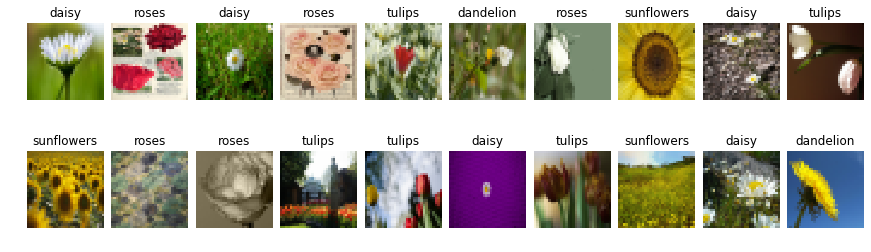

In [35]:
fig, ax = plt.subplots(2,10,figsize=(15,4.5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for j in range(0,2):
    for i in range(0, 10):
        ax[j,i].imshow(X_train[i+j*10,:,:,:])
        ax[j,i].set_title(class_names[y_train[i+j*10]])
        ax[j,i].axis('off')
plt.show()

---
# Normalize Data


**EXERCISE**<br>
<pre>Normalisasikan data jika diperlukan!</pre>

have fun

In [36]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

mean_image = np.mean(X_train, axis = 0)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image

y_train_hot = to_categorical(y_train)
y_val_hot = to_categorical(y_val)
y_test_hot = to_categorical(y_test)

print('y_train_hot.shape =',y_train_hot.shape)
print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (2000, 5)
y_val_hot.shape   = (670, 5)
y_test_hot.shape  = (1000, 5)


---
# Create your own model


**EXERCISE**<br>
<pre>Buatlah model klasifikasimu sendiri!</pre>

* load pretrain
* define new layers
* define trainable layers
* have fun

In [37]:
model = applications.VGG19(weights = "imagenet", include_top=False)
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [38]:
x = model.output
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_class, activation='softmax')(x)

myModel = Model(inputs=model.input, outputs=predictions, name='VGG FC')
myModel.summary()


Model: "VGG FC"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0    

## Compile Model


**EXERCISE**<br>
<pre>Compile Modelmu!</pre>

In [0]:
myModel.compile(loss='categorical_crossentropy',
                        optimizer=opt, metrics=['accuracy'])

---
# Additional Scheme
tambahan implementasi jika dibutuhkan
* Data Augmentation ?
* have fun

---
# Train the model


**EXERCISE**<br>
<pre>Latih modelmu! Definisikanlah batch size dan epoch</pre>
<pre>Gunakan data validasi</pre>

In [0]:
batch_size=512
epochs = 10

In [41]:
history = myModel.fit(X_train, y_train_hot,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val, y_val_hot),
                    shuffle=True)

Train on 2000 samples, validate on 670 samples
Epoch 1/10
2000/2000 [==============================] - 12s 6ms/sample - loss: 4.2884 - acc: 0.1999 - val_loss: 1.6427 - val_acc: 0.2273
Epoch 2/10
2000/2000 [==============================] - 1s 470us/sample - loss: 1.6234 - acc: 0.2345 - val_loss: 1.6068 - val_acc: 0.2284
Epoch 3/10
2000/2000 [==============================] - 1s 465us/sample - loss: 1.6051 - acc: 0.2316 - val_loss: 1.6025 - val_acc: 0.2443
Epoch 4/10
2000/2000 [==============================] - 1s 466us/sample - loss: 1.6069 - acc: 0.2244 - val_loss: 1.6019 - val_acc: 0.2249
Epoch 5/10
2000/2000 [==============================] - 1s 465us/sample - loss: 1.6044 - acc: 0.2320 - val_loss: 1.6020 - val_acc: 0.2552
Epoch 6/10
2000/2000 [==============================] - 1s 467us/sample - loss: 1.6046 - acc: 0.2360 - val_loss: 1.6019 - val_acc: 0.2330
Epoch 7/10
2000/2000 [==============================] - 1s 468us/sample - loss: 1.6025 - acc: 0.2329 - val_loss: 1.6010 - val_

## Plot History Training

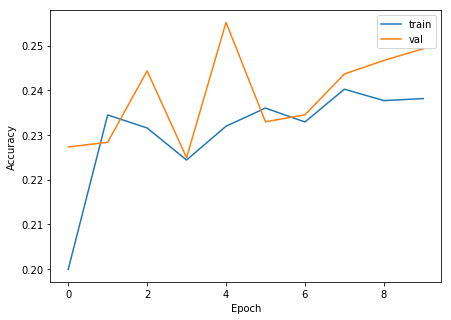

In [42]:
plt.rcParams['figure.figsize'] = [7, 5]

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


---
# Evaluasi Model


**EXERCISE**<br>
<pre>Evaluasikan modelmu pada data test!</pre>

In [43]:
scores = myModel.evaluate(X_test, y_test_hot, verbose=1)

1000/1000 [==============================] - 1s 843us/sample - loss: 1.5974 - acc: 0.2540


In [44]:
print('Test loss    :', scores[0])
print('Test accuracy: %.2f%%' % (scores[1]*100))

Test loss    : 1.597416763305664
Test accuracy: 25.40%


---
# Menguji Pada Image Dari Internet
* Search Gambar di Internet (Google Image)
* Copy Image Address
* Paste Image Address ke cell di bawah

In [45]:
!wget -O 'test_dandelion.jpg' 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/TaraxacumOfficinaleSeed.JPG/220px-TaraxacumOfficinaleSeed.JPG'
!wget -O 'test_roses.jpg' 'https://images.homedepot-static.com/productImages/612ae505-9daf-45c3-ac16-67f97dcb251d/svn/globalrose-flower-bouquets-prime-100-red-roses-64_1000.jpg'

--2019-08-12 04:00:10--  https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/TaraxacumOfficinaleSeed.JPG/220px-TaraxacumOfficinaleSeed.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10859 (11K) [image/jpeg]
Saving to: ‘test_dandelion.jpg’

test_dandelion.jpg  100%[===================>]  10.60K  --.-KB/s    in 0s      

2019-08-12 04:00:10 (82.7 MB/s) - ‘test_dandelion.jpg’ saved [10859/10859]

--2019-08-12 04:00:15--  https://images.homedepot-static.com/productImages/612ae505-9daf-45c3-ac16-67f97dcb251d/svn/globalrose-flower-bouquets-prime-100-red-roses-64_1000.jpg
Resolving images.homedepot-static.com (images.homedepot-static.com)... 35.186.226.36
Connecting to images.homedepot-static.com (images.homedepot-static.com)|35.186.226.36|:443... connected.
HTTP request sent, awaiting respon

## Load Image

<function matplotlib.pyplot.show>

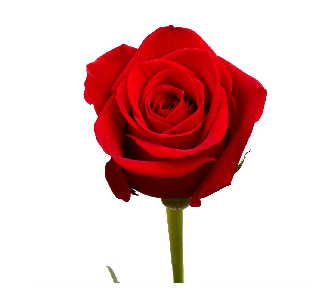

In [46]:
new_img = Image.open('test_roses.jpg')
new_img = np.array(new_img)
plt.imshow(new_img)
plt.axis('off')
plt.show

## Resize Image

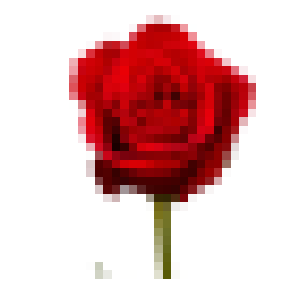

In [47]:
new_img2 = cv.resize(new_img, input_shape[:2], interpolation=cv.INTER_AREA)
plt.imshow(new_img2)
plt.axis('off')
plt.show()

## View Prediction

In [48]:
new_img2 = np.expand_dims(new_img2,0)
pred = myModel.predict(new_img2)
class_id = np.argmax(pred)
print('id kelas prediksi',class_id)
print('kelas prediksi', class_names[class_id])

id kelas prediksi 0
kelas prediksi dandelion


<p>Copyright &copy; 2019 <a href=https://www.linkedin.com/in/andityaarifianto/>ADF</a> </p>